In [3]:
%pip install pytesseract


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.4/165.4 kB 1.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 1.3 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 1.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 1.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 1.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 MB 841.6 kB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.6/270.6 kB 881.0 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 638.5 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.4/35.4 MB 1.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.2/279.2 kB 1.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [13]:
pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 1.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 1.2 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


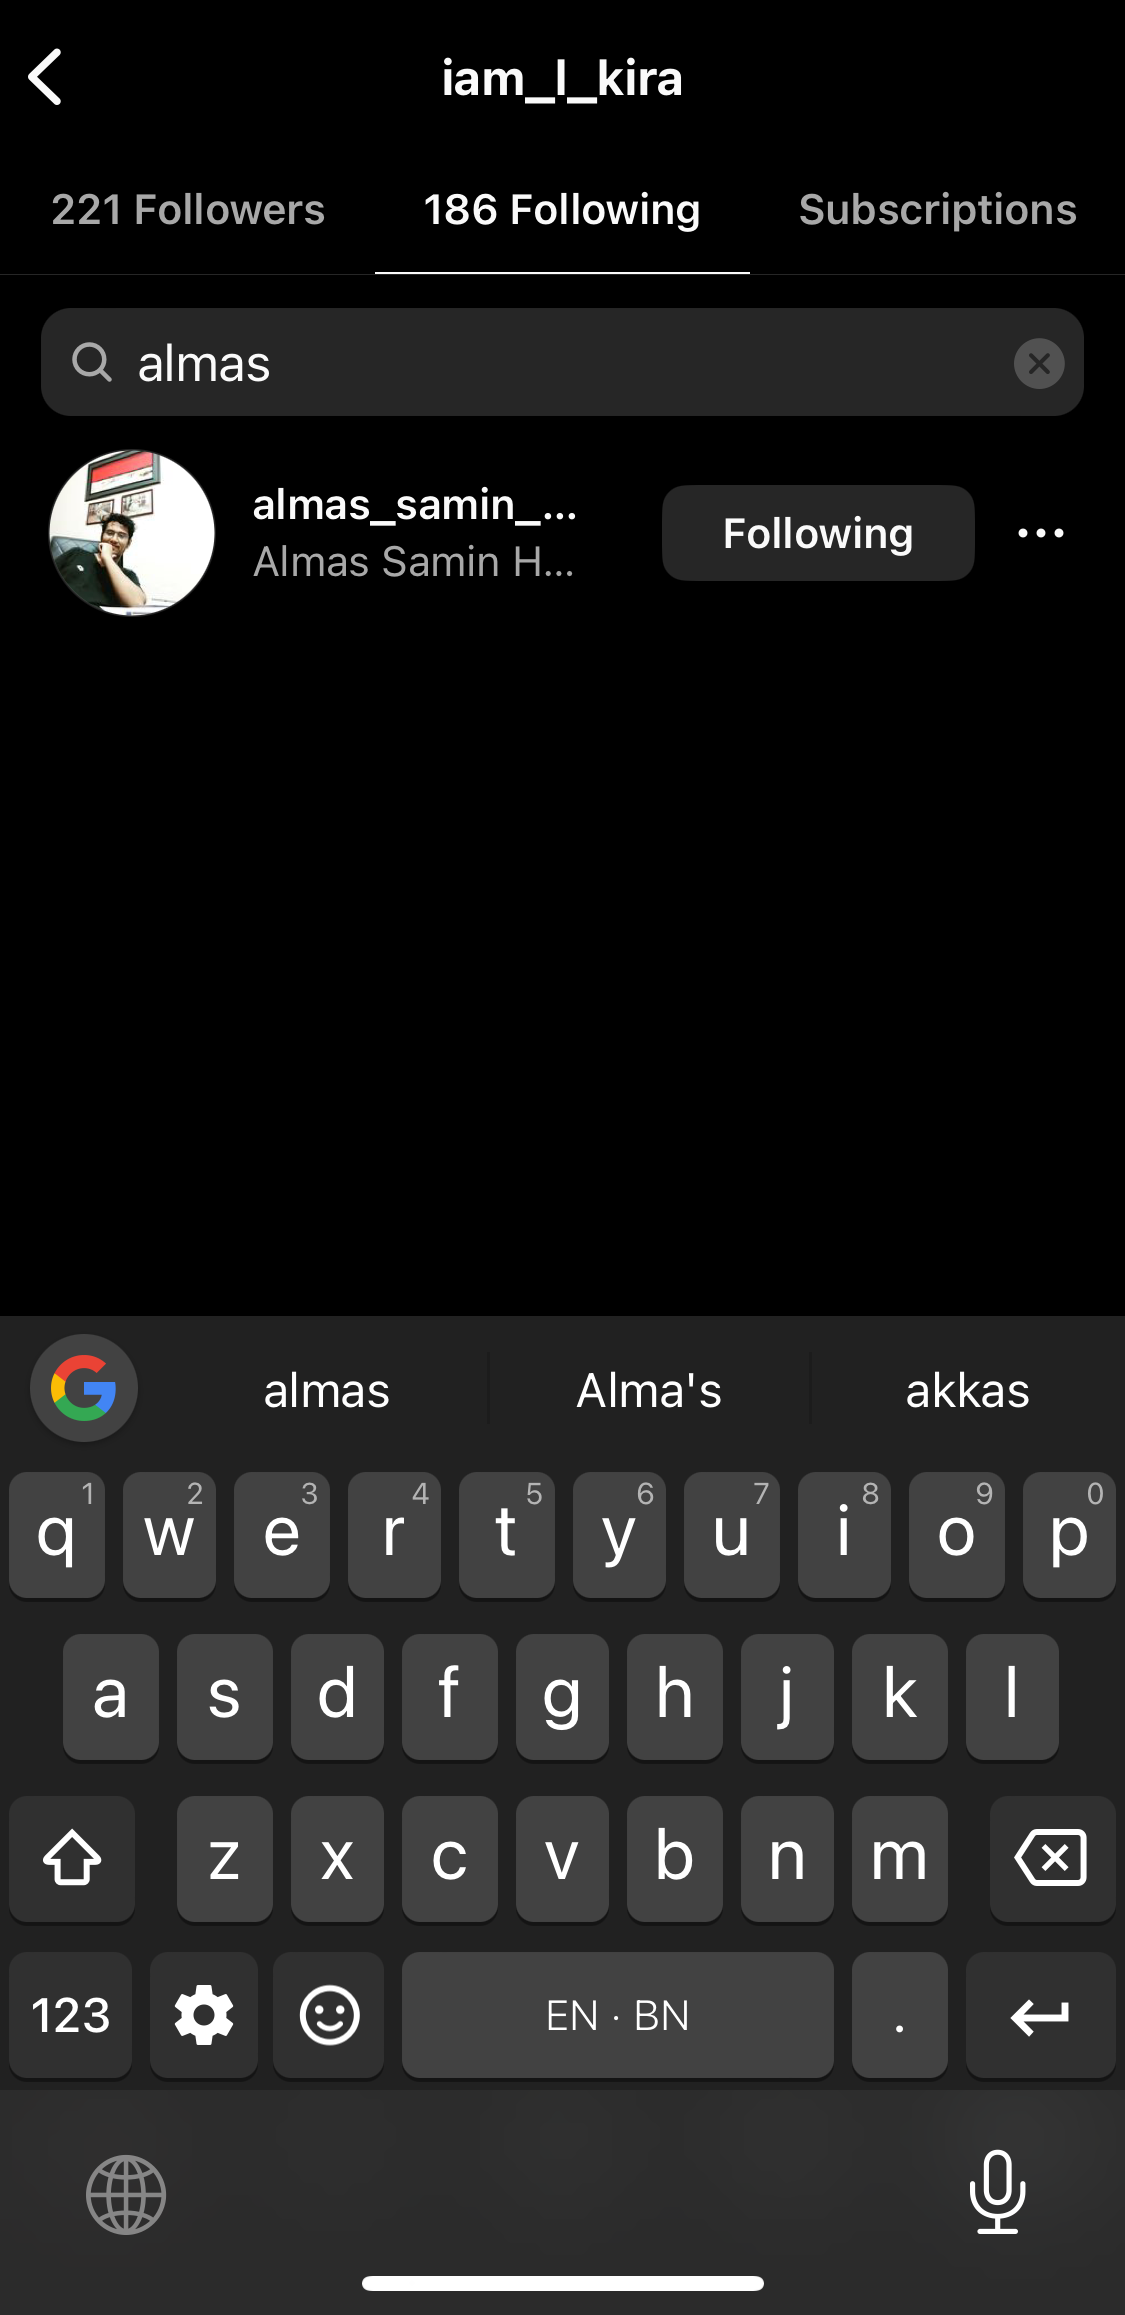

In [61]:
# Get the dimensions of the original image
original_image = Image.open('IMG_7704.PNG')
width, height = original_image.size

# Set the crop coordinates to remove the upper part (adjust the values as needed)
top_crop = int(height * 0.05)
bottom_crop = height   # Keep 80% of the original height

# Crop the image
cropped_image = original_image.crop((0, top_crop, width, bottom_crop))

# Save the cropped image
display(cropped_image)

In [32]:
import numpy as np
from PIL import Image
import easyocr

# Get the dimensions of the original image
original_image = Image.open('photo_2024-01-22 21.19.59.jpeg')
width, height = original_image.size

# Set the crop coordinates to remove the upper part (adjust the values as needed)
top_crop = int(height * 0.05)
bottom_crop = height   # Keep 80% of the original height

# Crop the image
cropped_image = original_image.crop((0, top_crop, width, bottom_crop))

# Convert the PIL Image to a numpy array
image_array = np.array(cropped_image)

# Initialize the OCR reader
reader = easyocr.Reader(['en'], gpu=False)  # this needs to run only once to load the model into memory

# Read text from the image
result = reader.readtext(image_array, detail=0)

print(result)


Using CPU. Note: This module is much faster with a GPU.


['Yes;', 'studied', 'Comments', 'Timed', 'Newest', 'Remember to keep comments respectful and to follow our Community', 'Guidelines', 'Pinned by BB Ki Vines', '@BBKiVines', 'Sy ago', 'When life gives you lemons, make Ayesha Takial :D', 'Keep Sharing, Keep Lovingl <3', '0 52K', '5P', '467 replies', '@panthosarker-yvbxt -', 'Os ago', 'Best comedy video', '0', 'E', 'UniT', '@Unitechzone', 'Sy ago', 'Aagaye ABD aur VIRAT KOHLI', 'Add a comment:', 'Top']


In [42]:
found = any(s.startswith('@panthosarker') for s in result)
found

True

In [22]:
result[4+1]

'almas'

In [20]:
search_string = 'sadhguru'

if 'No users found' in result:
    is_following = False
elif search_string in result:
    index = result.index(search_string)
    is_following = 'Following' in result[index+1] or 'Following' in result[index+2]
else:
    is_following = False

print(is_following)

True


In [2]:
search_string = 'rezuke-reynaldo'

found = any(search_string in s.replace('@', '') for s in result)

print(found)

True


In [14]:
#make result into a dataframe
import pandas as pd
df = pd.DataFrame(result)
df

,0,1,2
0,"[[217, 17], [241, 17], [241, 33], [217, 33]]",0x,0.257359
1,"[[502, 12], [550, 12], [550, 38], [502, 38]]",44%,0.841540
2,"[[596, 12], [660, 12], [660, 38], [596, 38]]",10.48,0.997532
3,"[[138, 80], [272, 80], [272, 129], [138, 129]]",rezuke,0.999997
4,"[[32, 194], [210, 194], [210, 226], [32, 226]]",579 followers,0.935352
5,"[[271, 189], [452, 189], [452, 231], [271, 231]]",538 following,0.984139
6,"[[523, 193], [703, 193], [703, 231], [523, 231]]",subscriptions,0.999986
7,"[[119, 291], [272, 291], [272, 342], [119, 342]]",sadhgury,0.988244
8,"[[165, 421], [351, 421], [351, 457], [165, 457]]",Sync contacts,0.998919
9,"[[525, 441], [597, 441], [597, 477], [525, 477]]",Sync,0.999976


In [52]:
print(result)

[([[136, 14], [273, 14], [273, 65], [136, 65]], 'rezuke', 0.9999769804548143), ([[32, 130], [210, 130], [210, 162], [32, 162]], '579 followers', 0.9353516563637664), ([[271, 125], [452, 125], [452, 167], [271, 167]], '538 following', 0.9841390832802509), ([[523, 129], [705, 129], [705, 167], [523, 167]], 'subscriptions', 0.999985816017449), ([[119, 227], [272, 227], [272, 278], [119, 278]], 'sadhgury', 0.9882440773187159), ([[165, 357], [351, 357], [351, 393], [165, 393]], 'Sync contacts', 0.998918715481142), ([[525, 377], [597, 377], [597, 413], [525, 413]], 'Sync', 0.999970018863678), ([[165, 393], [443, 393], [443, 433], [165, 433]], 'Find people you know', 0.7263918634698703), ([[179, 513], [309, 513], [309, 551], [179, 551]], 'sadhguru', 0.7115356036479076), ([[455, 529], [588, 529], [588, 573], [455, 573]], 'Following', 0.9999921321714139), ([[179, 551], [309, 551], [309, 589], [179, 589]], 'Sadhguru', 0.9718884054520485), ([[181, 657], [383, 657], [383, 695], [181, 695]], '_sadh

In [22]:
only_strings = [word for word in result if word.isalpha()]

print(only_strings)

['Subscriptions', 'Q', 'almas', 'Following', 'almas', 'akkas', 'q', 'W', 'e', 't', 'y', 'U', 'a', 'S', 'd', 'f', 'g', 'h', 'z', 'C', 'b', 'n', 'm', 'EN', 'BN']


In [23]:
strings_and_mixed = [word for word in result if not word.isnumeric()]

print(strings_and_mixed)

['2.15', 'iam_I_kira', '221 Followers', '186 Following', 'Subscriptions', 'Q', 'almas', 'almas_samin__', 'Almas Samin H_', 'Following', 'almas', "Alma's", 'akkas', 'q', 'W', 'e', 't', 'y', 'U', 'a', 'S', 'd', 'f', 'g', 'h', 'z', 'C', 'b', 'n', 'm', 'EN', 'BN']


In [3]:
from PIL import Image
import pytesseract

# Set the path to the Tesseract executable (modify if necessary)
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

# Open an image file
image_path = 'Screenshot_20240121_224849.jpg'
img = Image.open(image_path)

# Perform OCR on the image
text = pytesseract.image_to_string(img)

# Print the extracted text
print(text)


PermissionError: [Errno 13] Permission denied: '/Users/diganto/Data/Upwork/MultFormFlow/MultiFormFlow/.venv/lib/python3.11/site-packages'

In [8]:
text = pytesseract.image_to_string(img)

TesseractNotFoundError: /usr/bin/tesseract is not installed or it's not in your PATH. See README file for more information.